In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [4]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.pipeline import Pipeline

from sklearn.model_selection import \
    KFold, RepeatedKFold, GridSearchCV, \
    cross_validate, train_test_split

from ipywidgets import *
from IPython.display import display

import warnings

In [79]:
X_train = pd.read_csv('./output/X_train_sc.csv')
X_val = pd.read_csv('./output/X_val_sc.csv')
X_test = pd.read_csv('./output/X_test_sc.csv')

In [80]:
y_train = pd.read_csv('./output/y_train.csv')
y_val = pd.read_csv('./output/y_val.csv')

# Ridge

We will now tune parameters for Ridge, Lasso, and Elastic Net to improve performance.

In [70]:
params = {'alpha':np.logspace(0,5,200)}

In [71]:
grid = GridSearchCV(estimator = Ridge(),param_grid = params, cv = 5)

In [72]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e+00, 1.05956018e+00, 1.12266777e+00, 1.18953407e+00,
       1.26038293e+00, 1.33545156e+00, 1.41499130e+00, 1.49926843e+00,
       1.58856513e+00, 1.68318035e+00, 1.78343088e+00, 1.88965234e+00,
       2.00220037e+00, 2.12145178e+00, 2.24780583e+00, 2.38168555e+00,
       2.52353917e+00, 2.67384162e+00, 2.83309610e+00, 3....
       2.64308149e+04, 2.80050389e+04, 2.96730241e+04, 3.14403547e+04,
       3.33129479e+04, 3.52970730e+04, 3.73993730e+04, 3.96268864e+04,
       4.19870708e+04, 4.44878283e+04, 4.71375313e+04, 4.99450512e+04,
       5.29197874e+04, 5.60716994e+04, 5.94113398e+04, 6.29498899e+04,
       6.66991966e+04, 7.06718127e+04, 7.48810386e+04, 7.93409667e+04,
       8.40665289e+04, 8.90735464e+04, 9.43787828e+04, 1.00000000e+05])})

In [73]:
grid.best_score_

0.8405563266703211

In [74]:
grid.best_estimator_

Ridge(alpha=273.6439997074672)

In [82]:
ridge = Ridge(alpha = 273.64)
model = 'ridge'
ridge.fit(X_train,y_train)
train = ridge.score(X_train,y_train)
y_pred = ridge.predict(X_val)
test = ridge.score(X_val,y_val)
mse = mean_squared_error(y_val,y_pred,squared=False)


In [83]:
print(train,test,mse)

0.8833543225585851 0.839744602093918 31368.32967037231


Sligtly more overfit than E-Net default, but also better MSE.

# Lasso

In [91]:
params = {'alpha':np.logspace(0,5,200)}

In [92]:
grid = GridSearchCV(estimator = Lasso(),param_grid = params, cv = 5)

In [93]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e+00, 1.05956018e+00, 1.12266777e+00, 1.18953407e+00,
       1.26038293e+00, 1.33545156e+00, 1.41499130e+00, 1.49926843e+00,
       1.58856513e+00, 1.68318035e+00, 1.78343088e+00, 1.88965234e+00,
       2.00220037e+00, 2.12145178e+00, 2.24780583e+00, 2.38168555e+00,
       2.52353917e+00, 2.67384162e+00, 2.83309610e+00, 3....
       2.64308149e+04, 2.80050389e+04, 2.96730241e+04, 3.14403547e+04,
       3.33129479e+04, 3.52970730e+04, 3.73993730e+04, 3.96268864e+04,
       4.19870708e+04, 4.44878283e+04, 4.71375313e+04, 4.99450512e+04,
       5.29197874e+04, 5.60716994e+04, 5.94113398e+04, 6.29498899e+04,
       6.66991966e+04, 7.06718127e+04, 7.48810386e+04, 7.93409667e+04,
       8.40665289e+04, 8.90735464e+04, 9.43787828e+04, 1.00000000e+05])})

In [94]:
grid.best_score_

0.8392638174562727

In [95]:
grid.best_estimator_

Lasso(alpha=547.8901179593945)

In [96]:
lasso = Lasso(alpha = 547.89)
model = 'lasso'
lasso.fit(X_train,y_train)
train = lasso.score(X_train,y_train)
y_pred = lasso.predict(X_val)
test = lasso.score(X_val,y_val)
mse = mean_squared_error(y_val,y_pred,squared=False)


In [97]:
print(train,test,mse)

0.8827528359813215 0.8445525536769786 30894.193057709577


#  Elastic Net

In [102]:
params = {'alpha':np.logspace(0,5,200),'l1_ratio':[0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99]}

In [103]:
grid = GridSearchCV(estimator = ElasticNet(),param_grid = params, cv = 5)

In [104]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': array([1.00000000e+00, 1.05956018e+00, 1.12266777e+00, 1.18953407e+00,
       1.26038293e+00, 1.33545156e+00, 1.41499130e+00, 1.49926843e+00,
       1.58856513e+00, 1.68318035e+00, 1.78343088e+00, 1.88965234e+00,
       2.00220037e+00, 2.12145178e+00, 2.24780583e+00, 2.38168555e+00,
       2.52353917e+00, 2.67384162e+00, 2.83309610e+...
       3.33129479e+04, 3.52970730e+04, 3.73993730e+04, 3.96268864e+04,
       4.19870708e+04, 4.44878283e+04, 4.71375313e+04, 4.99450512e+04,
       5.29197874e+04, 5.60716994e+04, 5.94113398e+04, 6.29498899e+04,
       6.66991966e+04, 7.06718127e+04, 7.48810386e+04, 7.93409667e+04,
       8.40665289e+04, 8.90735464e+04, 9.43787828e+04, 1.00000000e+05]),
                         'l1_ratio': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                      0.8, 0.9, 0.99]})

In [105]:
grid.best_score_

0.8407793102421802

In [106]:
grid.best_estimator_

ElasticNet(alpha=22.739657523579286, l1_ratio=0.99)

The L1 ratio close to 1 shows that Lasso is actually the preferable model

In [110]:
lasso_coef = pd.DataFrame(lasso.coef_.reshape(-1,1),X_train.columns,columns=['coef'])

In [111]:
lasso_coef.sort_values(by = 'coef', key = abs, ascending=False).head(10)

,coef
remainder__totrms_abvgrd,12016.311772
remainder__exter_qual,11008.050141
ohe__neighborhood_NridgHt,10819.986422
ohe__neighborhood_StoneBr,9313.700591
remainder__full_bath,8461.122743
remainder__garage_area,8323.808882
remainder__kitchen_qual,8239.289832
remainder__fireplaces,7614.856173
ohe__neighborhood_NoRidge,7544.228835
remainder__bsmt_exposure,7370.889437


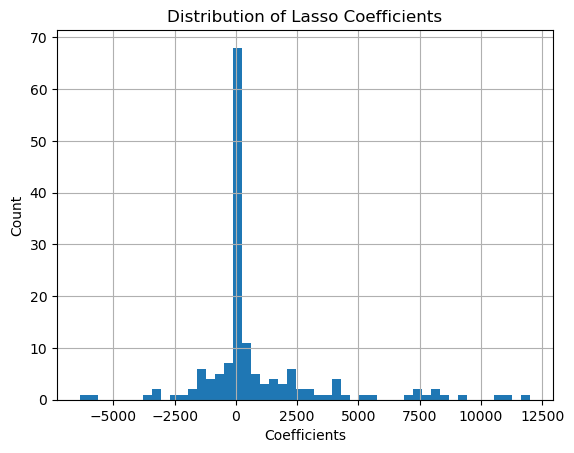

In [117]:
lasso_coef.hist(bins=50);
plt.title('Distribution of Lasso Coefficients')
plt.xlabel('Coefficients')
plt.ylabel('Count');

In [118]:
lasso_coef.sort_values(by = 'coef', key = abs, ascending=False).tail(10)

,coef
ohe__foundation_Slab,-0.0
ohe__foundation_Stone,-0.0
ohe__foundation_Wood,-0.0
ohe__sale_type_CWD,-0.0
ohe__condition_2_Feedr,-0.0
ohe__sale_type_ConLD,0.0
ohe__exterior_1st_BrkComm,0.0
ohe__condition_1_RRNn,-0.0
ohe__sale_type_WD,-0.0
ohe__sale_type_ConLw,0.0


Lasso zeroes out numerous unnecessary features.  

Final top 3 are total rooms (12k), Exterior Quality (11k) and the neighborhood categories (10.8k for Northridge Heights and 9300 for Stone Brook.

# Conclusion

Ultimately, the model is slightly underfit, and can only explain 84% of the variance in sale price for the test data.  We have attempted and rejected ways to tighten the fit by increasing the number of features through polynomial features engineering, but this produced severely over-fitted results.

In further iterations, we would likely attempt to manually generate a few additional features rather than open the floodgates of polynomial engineering.  However, this process must be done artfully, as we have invested significant effort to maintain the independence of our features.